In [ ]:
import mord
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

##Cargado de datos

In [ ]:
df_url='https://docs.google.com/spreadsheets/d/1NJiaIRABEh1mJrqzP6bAYBkhBruBwUUzplHdXViv9-g/export?format=csv'
df=pd.read_csv(df_url)

##Funciones

In [ ]:
def Summary(data, sheet):
    print(f"Hoja: {sheet}")

    # Crear la tabla de resumen
    resumen = {
        "Cantidad de filas": data.shape[0],
        "Cantidad de columnas": data.shape[1],
        "Datos faltantes": data.isnull().sum().sum(),
        "Filas duplicadas": data.duplicated().sum()
    }

    # Convertir el resumen en un DataFrame
    ResumenHoja = pd.DataFrame(resumen, index=["Resumen"])
    print("\nResumen:")
    display(ResumenHoja)

    print("\nEncabezado:")
    display(data.head())

##Analisis exploratorio de datos

In [ ]:
Summary(df,'Datos pacientes')

Hoja: Datos pacientes

Resumen:


,Cantidad de filas,Cantidad de columnas,Datos faltantes,Filas duplicadas
Resumen,212691,17,0,0



Encabezado:


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


se realiza una tabla de frecuencias y un grafico de barras para la variable respuesta

In [ ]:
df.Thyroid_Cancer_Risk.value_counts()

,count
Thyroid_Cancer_Risk,
Low,108388
Medium,72400
High,31903


In [ ]:
sns.set_style("whitegrid")

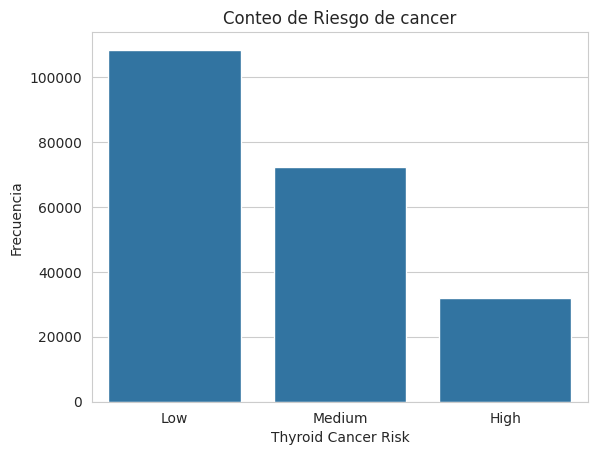

In [ ]:
plt.title('Conteo de Riesgo de cancer')
sns.countplot(x=df.Thyroid_Cancer_Risk)
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Frecuencia')
plt.show()

podemos observar que el dataset esta desbalanceado, tomaremos en cuenta esto mas adelante

realizaremos graficas de cada variable del dataset

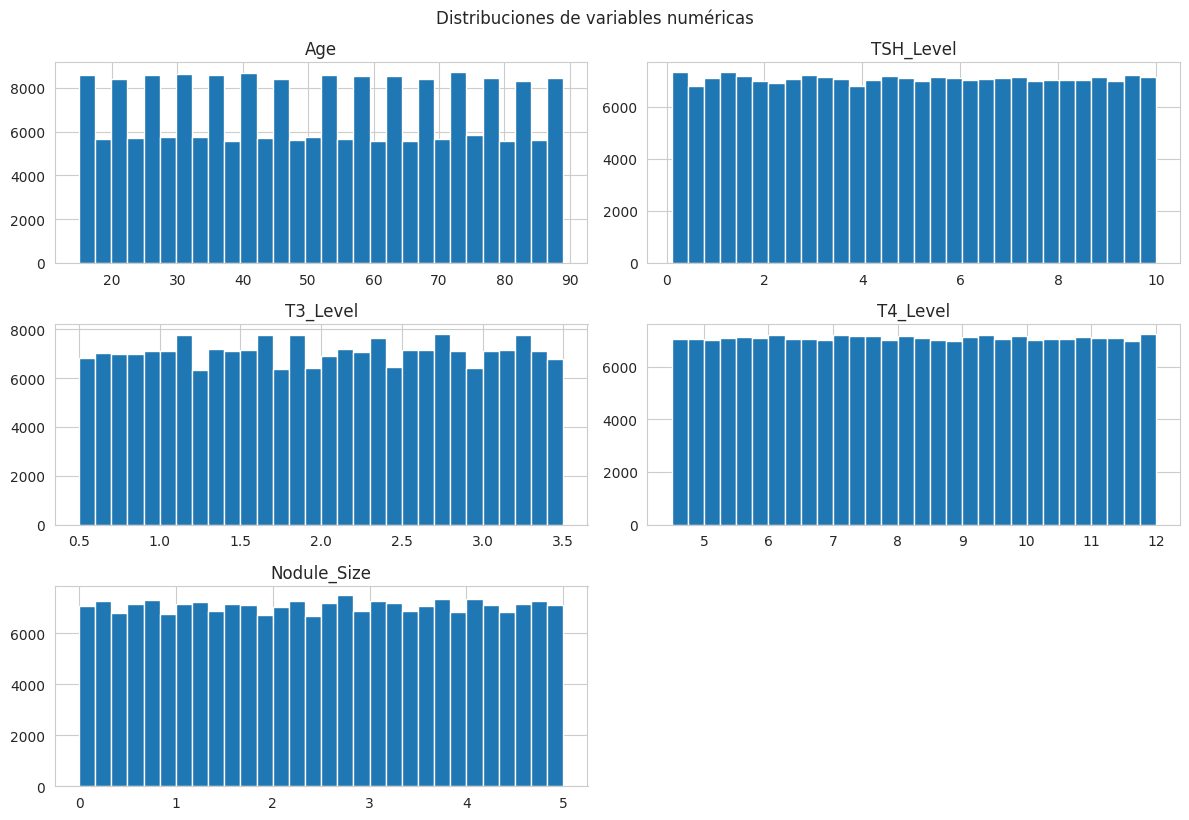

In [ ]:
numericas = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
df[numericas].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.suptitle('Distribuciones de variables numéricas', y=1.02)
plt.show()

se realiza lo mismo para las variables categoricas y tambien se realiza el conteo de cada categoria

In [ ]:
categoricas = ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
               'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']

Gender
Female    127527
Male       85164
Name: count, dtype: int64


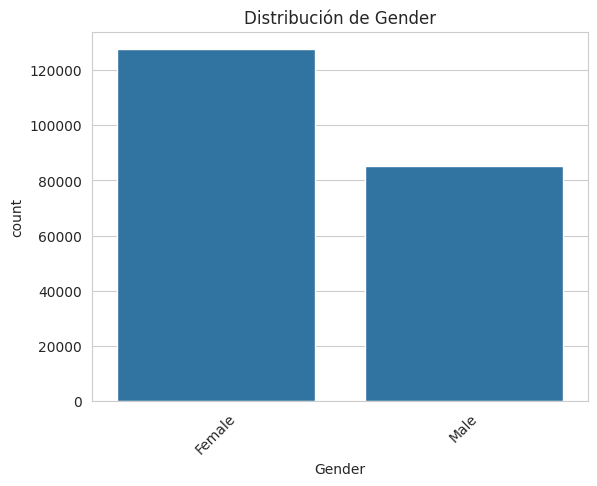

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64


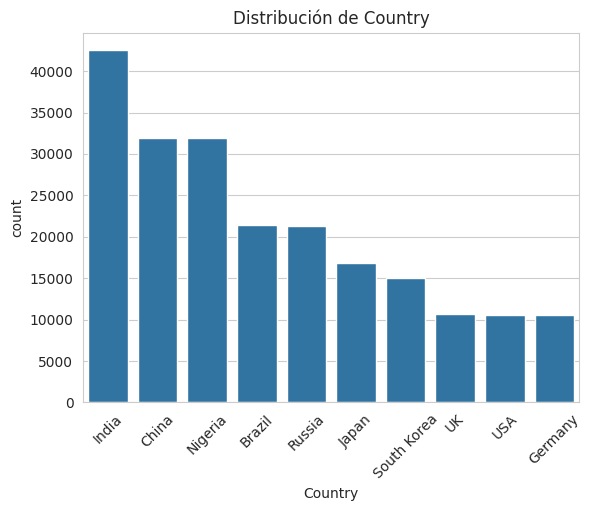

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64


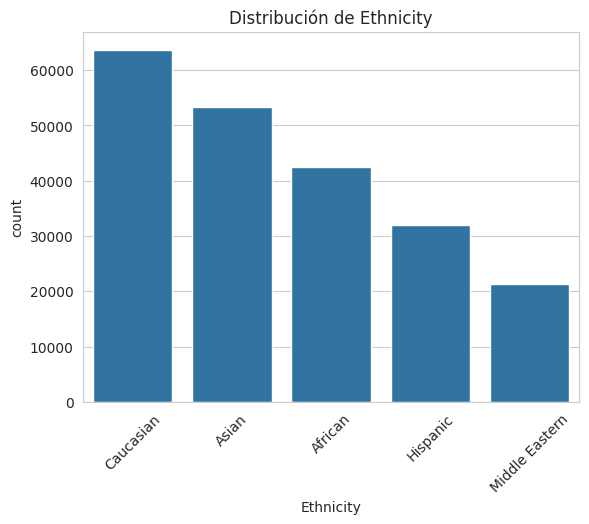

Family_History
No     148866
Yes     63825
Name: count, dtype: int64


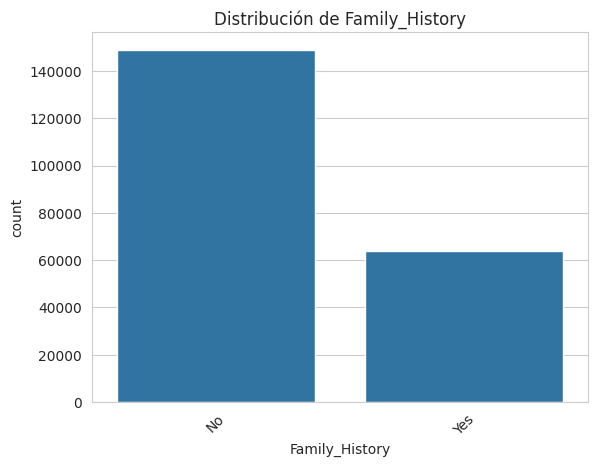

Radiation_Exposure
No     180831
Yes     31860
Name: count, dtype: int64


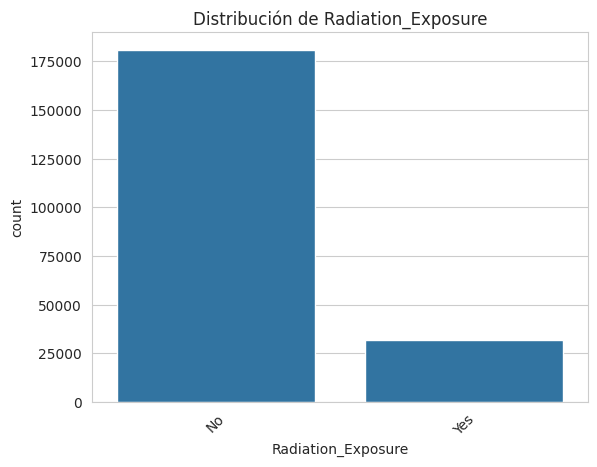

Iodine_Deficiency
No     159673
Yes     53018
Name: count, dtype: int64


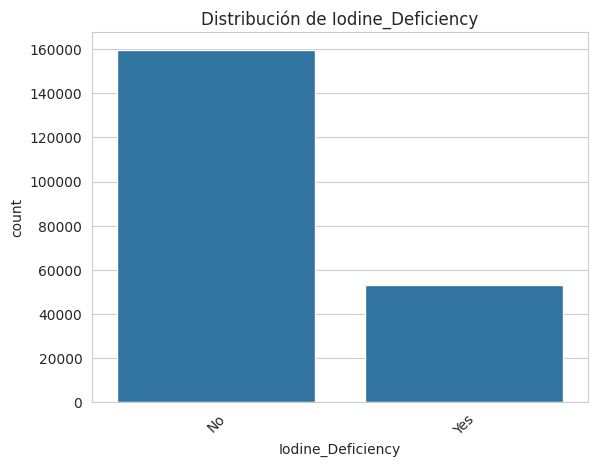

Smoking
No     170260
Yes     42431
Name: count, dtype: int64


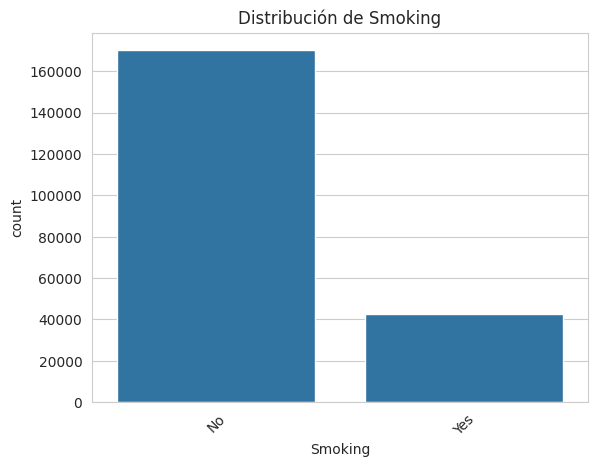

Obesity
No     148805
Yes     63886
Name: count, dtype: int64


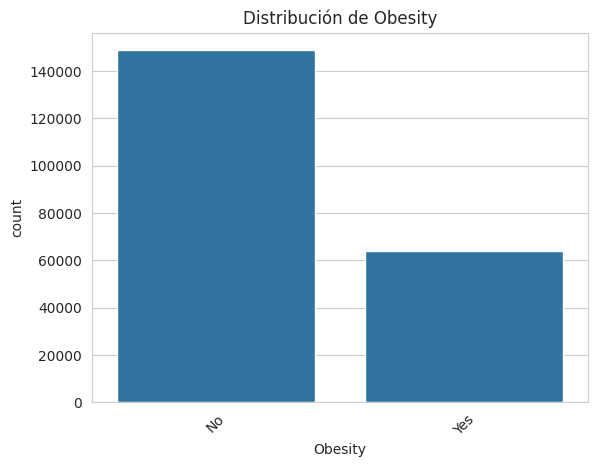

Diabetes
No     170098
Yes     42593
Name: count, dtype: int64


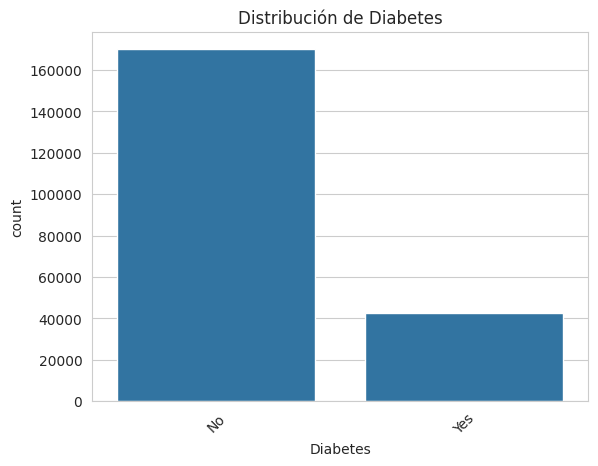

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64


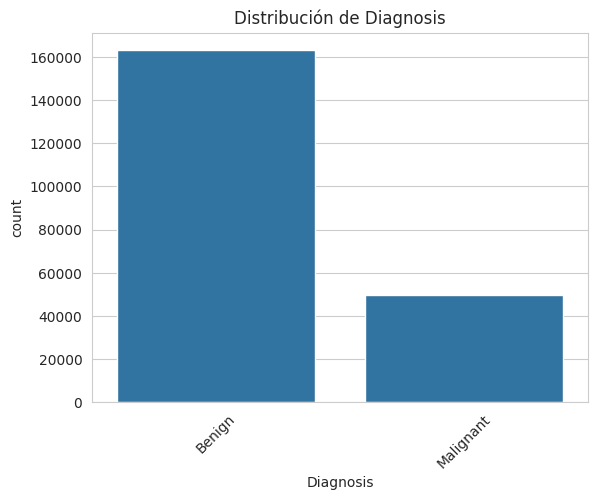

In [ ]:
for col in categoricas:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

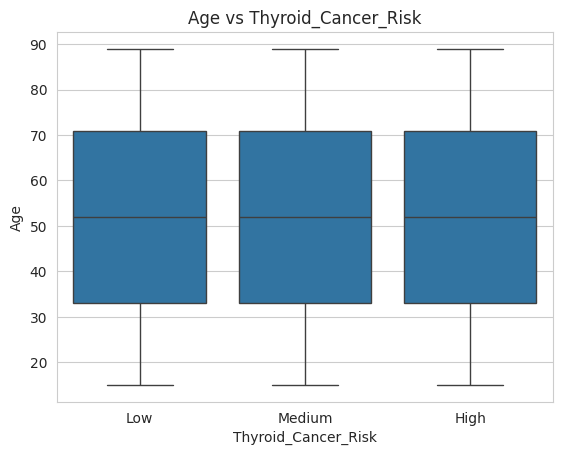

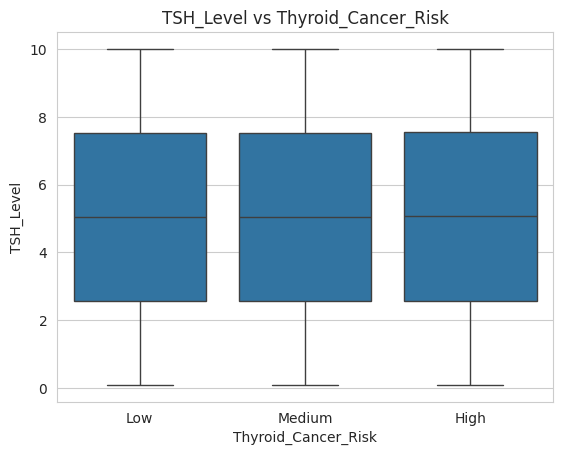

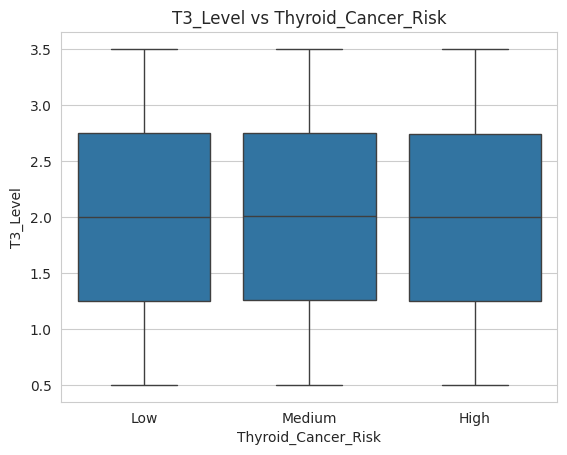

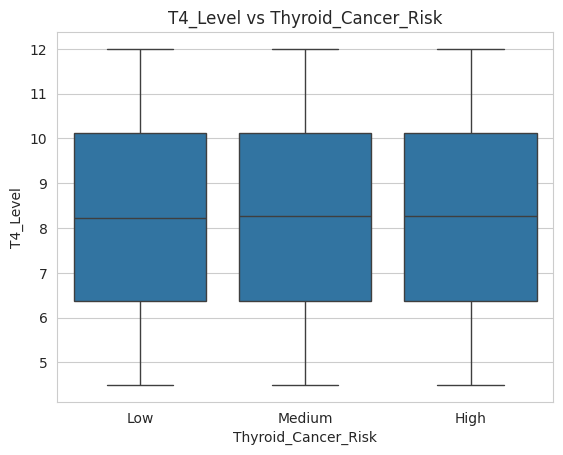

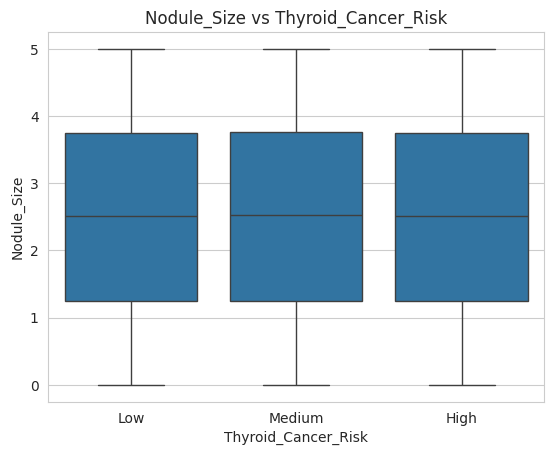

In [ ]:
for col in numericas:
    sns.boxplot(data=df, x="Thyroid_Cancer_Risk", y=col, order=['Low', 'Medium', 'High'])
    plt.title(f'{col} vs {"Thyroid_Cancer_Risk"}')
    plt.show()


Se realizan comparaciones entre la variable objetivo y las categoricas y se examina el numero de personas que pertenecen a cada una de las categorias con respecto a las otras variables

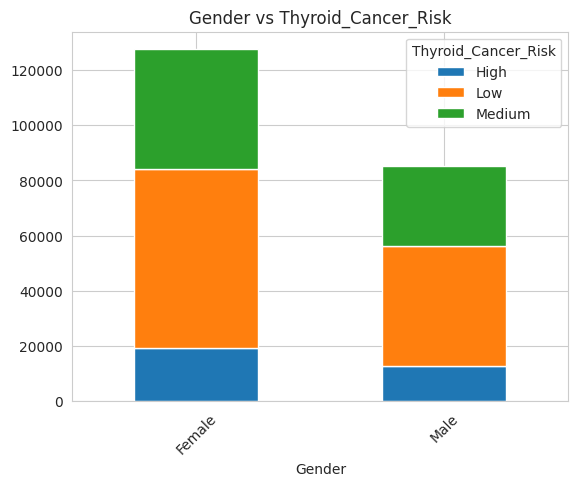

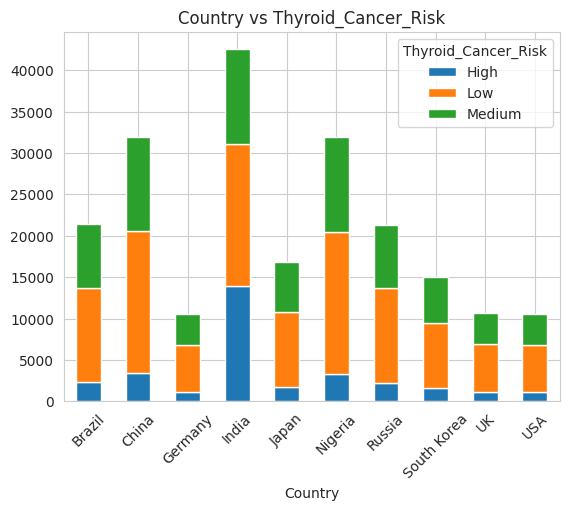

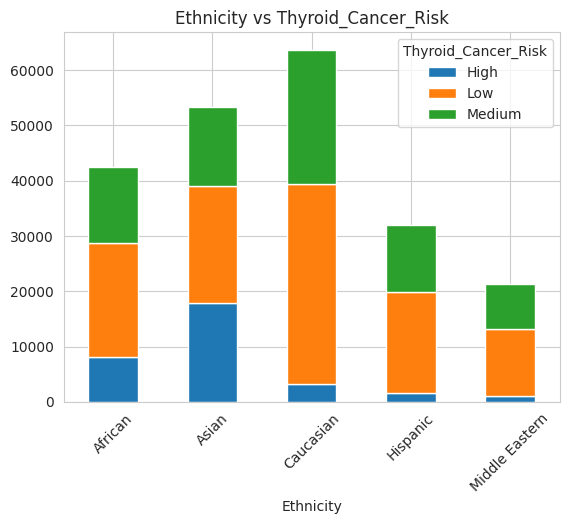

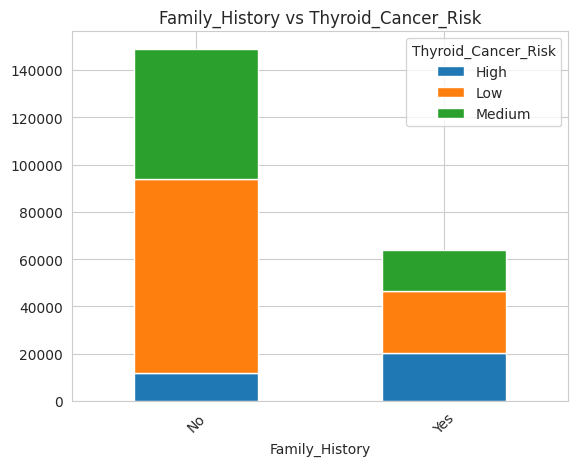

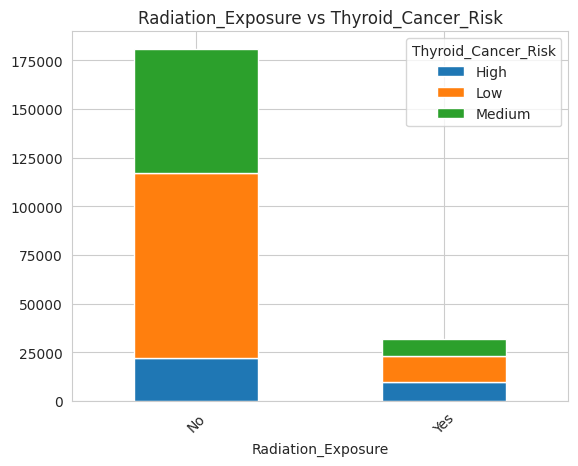

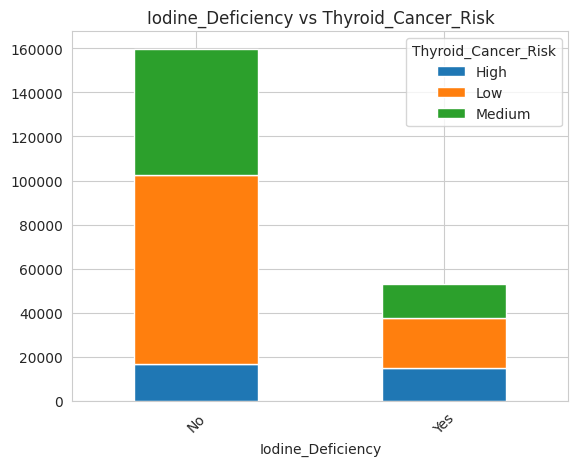

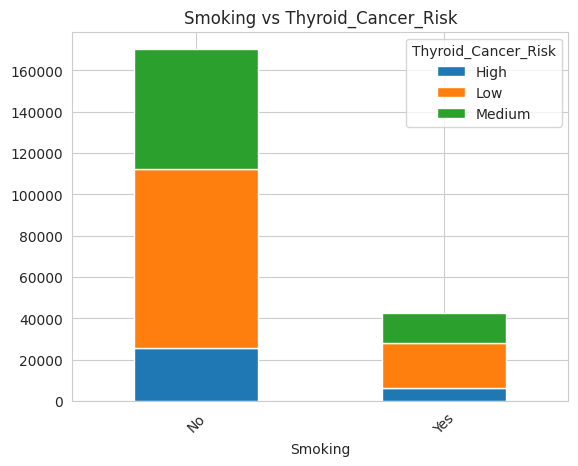

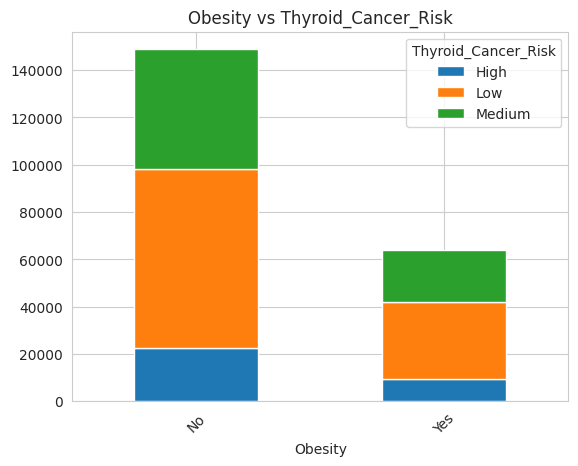

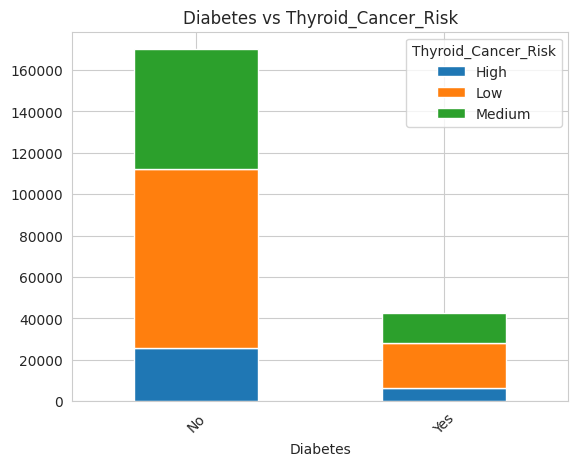

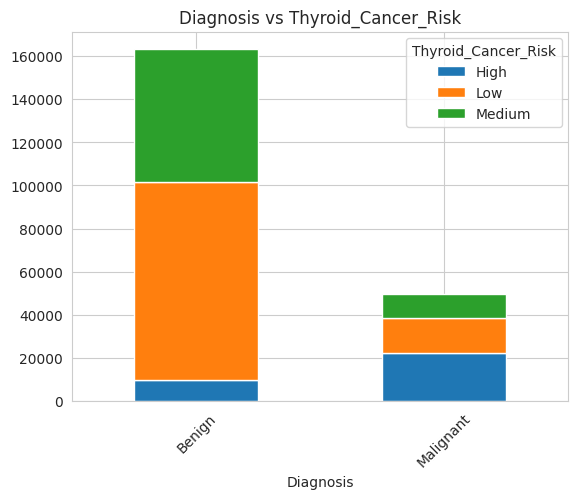

In [ ]:
for col in categoricas:
    tabla = pd.crosstab(df[col], df['Thyroid_Cancer_Risk'])
    tabla.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Thyroid_Cancer_Risk')
    plt.xticks(rotation=45)
    plt.show()

codificamos las variables categoricas a la hora de analizar las correlaciones y la multicolinealidad

In [ ]:
df_mul = df.copy()
df_mul=df_mul.drop(columns=['Patient_ID'])
binarias=['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis']
for col in binarias:
  df_mul[col]=df_mul[col].map({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, 'Benign': 0, 'Malignant': 1})

In [ ]:
df_mul=pd.get_dummies(df_mul,columns=['Country','Ethnicity'],drop_first=True,dtype=int)

In [ ]:
Orden_objetivo={'Low': 0, 'Medium': 1, 'High': 2}
df_mul['Thyroid_Cancer_Risk']=df_mul['Thyroid_Cancer_Risk'].map(Orden_objetivo)

realizamos la matriz de correlacion

In [ ]:
matriz_correlacion=df_mul.corr()

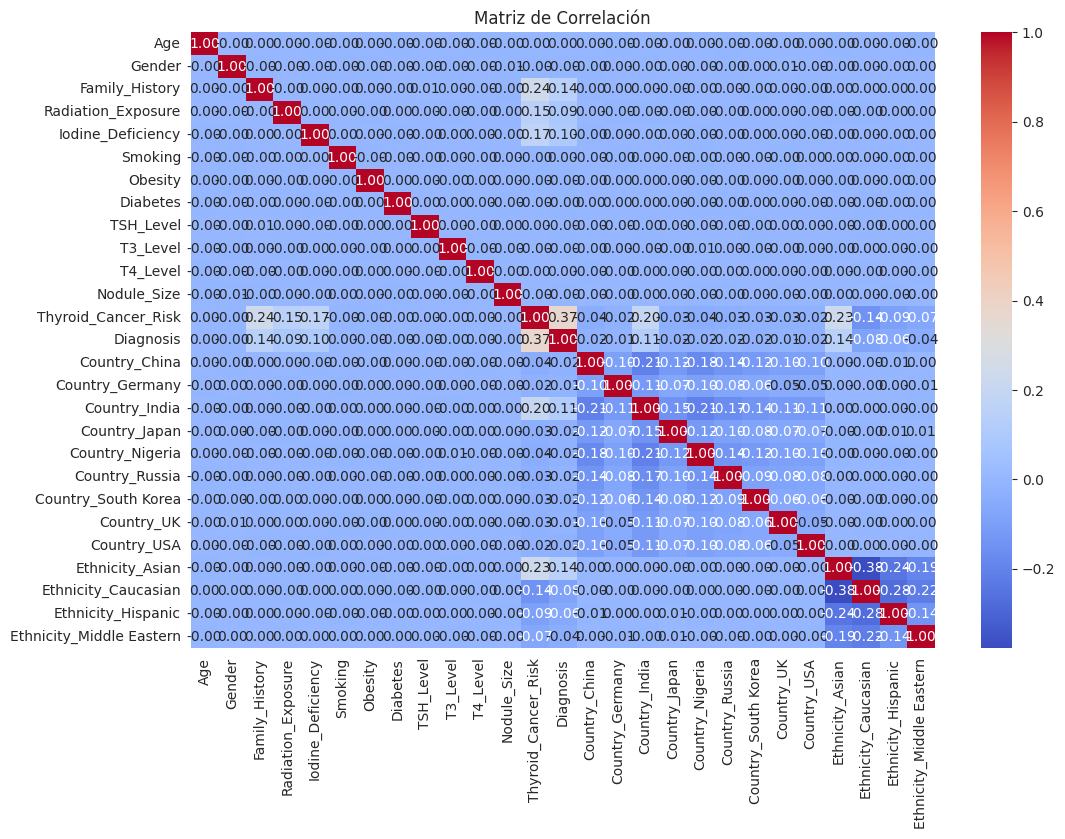

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

podemos observar que la mayoria de variables tiene una muy baja correlacion con respecto a la variable objetivo excepto diagnosis

Realizamos el calculo de VIF para determinar si hay variables que pueden afectar el modelo de gran manera

In [ ]:
X_vif=df_mul[numericas+binarias+[col for col in df_mul.columns if col.startswith('Country_') or col.startswith('Ethnicity_')]]
vif = pd.DataFrame()
vif['Variable'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nValores de VIF:")
print(vif.sort_values('VIF', ascending=False))


Valores de VIF:
                    Variable        VIF
3                   T4_Level  10.841893
0                        Age   5.943180
2                   T3_Level   5.628250
1                  TSH_Level   3.844363
4                Nodule_Size   3.751566
15             Country_India   2.603112
23       Ethnicity_Caucasian   2.351782
17           Country_Nigeria   2.185622
13             Country_China   2.185354
22           Ethnicity_Asian   2.138550
18            Country_Russia   1.791591
24        Ethnicity_Hispanic   1.681614
5                     Gender   1.643899
16             Country_Japan   1.627178
19       Country_South Korea   1.556206
25  Ethnicity_Middle Eastern   1.451051
6             Family_History   1.449898
10                   Obesity   1.417654
12                 Diagnosis   1.404412
20                Country_UK   1.395621
21               Country_USA   1.392078
14           Country_Germany   1.390770
8          Iodine_Deficiency   1.338625
11                  Dia

La variable T4-level tiene un VIF mayor que 10 por lo que la podemos eliminar del dataframe para el analisis de los modelos

In [ ]:
df_mul=df_mul.drop(columns=['T4_Level'])

# Evaluacion del dataset mediante regresion logistica

Se realizara una evaluacion del dataset reducido para saber si se le puede aplicar machine learning, utilizando la libreria mord para poder hacer regresion logistica ordinal, pero debemos recordar que el dataset esta desbalanceado por lo que vamos a realizar una pequeña comparacion cuando se realiza la regresion logistica con y sin balanceo

In [ ]:
X = df_mul.drop(columns=['Thyroid_Cancer_Risk'])
y = df_mul['Thyroid_Cancer_Risk']

In [ ]:
numericas = ['Age', 'TSH_Level', 'T3_Level', 'Nodule_Size']
scaler = StandardScaler()
X[numericas] = scaler.fit_transform(X[numericas])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = mord.LogisticIT()
model.fit(X_train, y_train)

LogisticIT()

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16258  4939   481]
 [10829  3334   317]
 [  370  2248  3763]]
              precision    recall  f1-score   support

           0       0.59      0.75      0.66     21678
           1       0.32      0.23      0.27     14480
           2       0.83      0.59      0.69      6381

    accuracy                           0.55     42539
   macro avg       0.58      0.52      0.54     42539
weighted avg       0.53      0.55      0.53     42539



se realiza el balanceo mediante SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
model_bal = mord.LogisticIT()
model_bal.fit(X_train_res, y_train_res)

LogisticIT()

In [ ]:
y_pred_bal = model_bal.predict(X_test)
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

[[11672  7498  2508]
 [ 7735  5041  1704]
 [    0   729  5652]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57     21678
           1       0.38      0.35      0.36     14480
           2       0.57      0.89      0.70      6381

    accuracy                           0.53     42539
   macro avg       0.52      0.59      0.54     42539
weighted avg       0.52      0.53      0.52     42539

